In [1]:
class weapon:
    def __init__(self,weapon_name,strength):
        self.weapon_name = weapon
        self.strength = strength
class character:
    def __init__(self, name, weapon, x_col = 0, y_col = 0, HP = 100,attack = 5):
        self.name = name
        try:
            self.pic = mpimg.imread('character.jpg', format = "jpg").copy()
        except FileNotFoundError:
            print("We couldn't find this file or directory")
        self.weapon = weapon
        self.HP = HP
        self.attack = attack
        self.x = x_col
        self.y=y_col
    def show_status(self):
        print("Your Status")
        print("Attack = ",self.attack)
        print("HP = ", self.HP)
    def __del__(self):
        return(self.name," You Died!")
 


        
################################ Implementing Monster ##########################

class Monster:

    def __init__(self, x_col, y_col, name, HP = 100, attack = 3):
        self.pic_monster = mpimg.imread('pic_monster.jpg', format = "jpg").copy()
        self.pic_goodie = mpimg.imread('pic_goodie.jpg', format = "jpg").copy()
        self.pic_flag = mpimg.imread('pic_flag.jpg', format = "jpg").copy()
        self.boss = mpimg.imread('boss.jpg', format = "jpg").copy()
        self.len_pic_monster, self.wid_pic_monster, self.pixels_pic_goodie = self.pic_monster.shape
        self.len_pic_goodie, self.wid_pic_goodie, self.pixels_pic_goodie = self.pic_goodie.shape
        self.x = x_col
        self.y = y_col
        self.HP = HP
        self.attack = attack
        self.name = name
    
    def pic(self):
        if self.x==23 and self.y==23:
            if self.HP<=0:
                return self.pic_flag
            else:
                return self.boss
        else:
            if self.HP<=0:
                return self.pic_goodie
            else:
                return self.pic_monster
    
    def length(self):
        if self.HP<=0:
            return self.len_pic_goodie
        else:
            return self.len_pic_monster
        
    def width(self):
        if self.HP<=0:
            return self.wid_pic_goodie
        else:
            return self.wid_pic_monster
    
    def attack(self):
        return self.attack
    
    def BeAttacked(self,AttackFromCharacter):
        self.HP = self.HP - AttackFromCharacter
    
    def HP(self):
        return self.HP
    
    def name(self):
        return self.name
    
    def x(self):
        return self.x
    
    def y(self):
        return self.y

In [2]:
############################## Implementing Map ##########################################

import matplotlib.image as mpimg 
from matplotlib import pyplot as plt
import numpy as np


class Map:
    '''
    a class for representing map, and it contains some 
    fucntions that can motify the map.
    '''
    def __init__(self):
        '''
        Initialize the map, read image:
        1. hw: horizontal wall (from view of user) with 200*1000 pixels
        2. vw: vertical wall (from view of user) with 1000*200 pixels
        3. floor: floor with 200*200 pixels.
        4. Map: a blank image.
        then set up map and walls layout, and store walls position in the map
        finally, store an original map, call it realMap
        Args:
            None
        Return: 
            None
        '''
        # read the images
        try:
            self.hw = mpimg.imread('hw.jpg', format = "jpg").copy()
            self.vw = mpimg.imread('vw.jpg', format = "jpg").copy()
            self.floor = mpimg.imread('floor.jpg', format = "jpg").copy()
            self.Map = mpimg.imread('blank.jpg', format = "jpg").copy()
        except FileNotFoundError:
            print("We couldn't find this file or directory")
        self.len_hw, self.wid_hw, self.pixels_hw = self.hw.shape
        self.len_vw, self.wid_vw, self.pixels_vw = self.vw.shape
        self.wallIndex = []
        
        # fill the map with floor.
        for i in range(24):
            for j in range(24):
                self.Map[i*200:(i+1)*200,j*200:(j+1)*200] = self.floor
        
        
        # outer four horizontal walls
        for i in range(2):
            self.Map[(0)*self.len_hw+600:(1)*self.len_hw+600,(3*i)*self.wid_hw+400:(3*i+1)*self.wid_hw+400] = self.hw
            for j in range(5):
                self.wallIndex.append((3,i*15+2+j))
            self.Map[(0)*self.len_hw+4200:(1)*self.len_hw+4200,(3*i)*self.wid_hw+400:(3*i+1)*self.wid_hw+400] = self.hw
            for j in range(5):
                self.wallIndex.append((21,i*15+2+j))
        
        
        # outer four vertical walls
        self.Map[(0)*self.len_vw+800:(1)*self.len_vw+800,(0)*self.wid_vw+200:(1)*self.wid_vw+200] = self.vw
        for i in range(5):
                self.wallIndex.append((4+i,1))
        self.Map[(0)*self.len_vw+800:(1)*self.len_vw+800,(0)*self.wid_vw+4400:(1)*self.wid_vw+4400] = self.vw
        for i in range(5):
                self.wallIndex.append((4+i,22))
        self.Map[(0)*self.len_vw+3200:(1)*self.len_vw+3200,(0)*self.wid_vw+200:(1)*self.wid_vw+200] = self.vw
        for i in range(5):
                self.wallIndex.append((16+i,1))
        self.Map[(0)*self.len_vw+3200:(1)*self.len_vw+3200,(0)*self.wid_vw+4400:(1)*self.wid_vw+4400] = self.vw
        for i in range(5):
                self.wallIndex.append((16+i,22))
                
                
        # inner four horizontal walls
        for i in range(2):
            self.Map[(0)*self.len_hw+1600:(1)*self.len_hw+1600,(2*i)*self.wid_hw+1000:(2*i+1)*self.wid_hw+1000] = self.hw
            for j in range(5):
                self.wallIndex.append((8,i*10+5+j))
            self.Map[(0)*self.len_hw+3200:(1)*self.len_hw+3200,(2*i)*self.wid_hw+1000:(2*i+1)*self.wid_hw+1000] = self.hw
            for j in range(5):
                self.wallIndex.append((16,i*10+5+j))
        
        
        # left-middle and right-middle two vertical walls
        self.Map[(0)*self.len_vw+2000:(1)*self.len_vw+2000,(0)*self.wid_vw+600:(1)*self.wid_vw+600] = self.vw
        for i in range(5):
                self.wallIndex.append((10+i,3))
        self.Map[(0)*self.len_vw+2000:(1)*self.len_vw+2000,(0)*self.wid_vw+4000:(1)*self.wid_vw+4000] = self.vw
        for i in range(5):
                self.wallIndex.append((10+i,20))
        
        
        # central three vertical walls
        for i in range(3):
            self.Map[(i)*self.len_vw+800+200*i:(i+1)*self.len_vw+800+200*i,(0)*self.wid_vw+2400:(1)*self.wid_vw+2400] = self.vw
            for j in range(5):
                self.wallIndex.append((i*5+4+i+j,12))
        
        # store an original map, call it realMap 
        self.realMap = self.Map.copy()
        

    def printMap(self):
        '''
        print the map
        '''
        fig, ax = plt.subplots(1,figsize = (10,10))
        plt.imshow(self.Map)
        plt.show()

        
    def Create_Monster(self,Monster):
        '''
        show a Monster in the map based on its position
        Args:
            Monster: a Moster object.
        Return: 
            None
        '''        
        self.Map[Monster.x*200:(Monster.x + 1)*200,
                 Monster.y*200:(Monster.y + 1)*200] = Monster.pic()

    def Create_character(self,character):
        '''
        show a character in the map based on his position.
        Args:
            character: a character object.
        Return: 
            None
        ''' 
        self.Map[character.x*200:(character.x + 1)*200,
                 character.y*200:(character.y + 1)*200] = character.pic
        
    def Clean_character_position(self,character):
        '''
        recover the place to floor in the map after the character moves.
        Args:
            character: a character object.
        Return: 
            None
        '''
        self.Map[character.x*200:(character.x + 1)*200,
                 character.y*200:(character.y + 1)*200] = self.realMap[character.x*200:(character.x + 1)*200,
                                                                   character.y*200:(character.y + 1)*200]

    def check_character_position(self, character, direction):
        '''
        check the character if hit the wall or go out of the range.
        Args:
            character: a character object.
            direction: a char which means a direction.
        Return: 
            a bool value
        '''
        x = 0
        y = 0                      # initialize x and y to 0
        
        # set x and y based on direction
        if direction == "W":
            x-=1
        elif direction == "A":
            y-=1
        elif direction == "S":
            x+=1
        elif direction == "D":
            y+=1
        
        # check if the character is out of the range.
        if character.x+x > 23 or character.x+x < 0 or character.y+y > 23 or character.y+y < 0:
            print(f"You are out of range.")
            return False
        # check if the character hits a wall.
        elif (character.x+x, character.y+y) in self.wallIndex:
            print(f"You hit the wall.")
            return False
        else:
            return True

In [3]:
def moving(m,c):
    
    m.Clean_character_position(c)
    

    answer = input("Please enter a movement W,A,S,D,E: ")
    if m.check_character_position(c, answer):
        if answer == "W":
             c.x-=1
        elif answer == "A":
            c.y-=1
        elif answer == "S":
            c.x+=1
        elif answer == "D":
             c.y+=1

        m.Create_character(c)
        return answer



def encounter(character, Monster):    
        
        
        if Monster.HP>0:
            print("You encountered a monster! Now let's fight!")
        else:
            return
    
        while Monster.HP>0 and character.HP>0:
            Monster.BeAttacked(character.attack)
            character.HP=character.HP - Monster.attack
            print("Monster attacked you! You now have " + str(character.HP) + " hit points!")
            print("You attacked the monster! It now has " + str(Monster.HP) + " hit points!")
        
        if Monster.HP>0:
            print("So bad, you died! The Monster still has " + str(Monster.HP) + " more hit points!")
            return    
    
        if Monster.HP<=0:
            if Monster.x==23 and Monster.y==23:
                print("congraduation! You win the game! Cheers!")
                print("""☆ *　. 　☆
　　. ∧＿∧　∩　* ☆
* ☆ ( ・∀・)/ .
　. ⊂　　 ノ* ☆
☆ * (つ ノ .☆
　　 (ノ""")
                return
            answer = input("You found a Goodie! Select from 1) Torch, 2) Archor, 3) Armor.")
            if answer == "1":
                print("Now you have a torch in your hand, congratulations!")
                print("Currently its a useless tool, but you looks fancier!")
                return
            elif answer == "2":
                print("Now you have a archor in your hand, congratulations!")
                character.attack = character.attack + 10
                print("Your Attacks increased by 10!")
                return
            elif answer == "3":
                print("Now you have a armor in your hand, congratulations!")

                character.HP = character.HP + 50
                print("Your Hitpoints increased by 50!")
                return
            else:
                print("It's fine, you don't have to select a goodie. It's not a bad idea to rely only on yourself!")
                return
        
        
        
def CheckEncounter(Monsterlist,character):
    for i in range(len(Monsterlist)):
        if Monsterlist[i].x==character.x and Monsterlist[i].y==character.y:
            encounter(character,Monsterlist[i])
            break

In [4]:
import random as rand

########################## item Creation ##############################
m = Map()

Weapon = weapon("Test Weapon",10)
Character = character("Tester",Weapon)

EndPoint = Monster(23,23,"End Point",100,10)
m.Create_Monster(EndPoint)
MonsterIndex=[(23,23)]
MonsterList=[EndPoint]

def MonsterGenerator(MonsterIndex,MonsterList):
    for i in range(30):
        x = rand.choice(list(range(24)))
        y = rand.choice(list(range(24)))
        while (x,y) in MonsterIndex or (x,y) in m.wallIndex:
            x = rand.choice(list(range(24)))
            y = rand.choice(list(range(24)))
        new_monster = Monster(x, y, "monster")
        m.Create_Monster(new_monster)
        MonsterList.append(new_monster)
        MonsterIndex.append((x,y))
    

def game():
    while True:
        m.printMap()
        Character.show_status()
        if moving(m,Character) == 'E':
            break
        m.Create_character(Character)
        CheckEncounter(MonsterList,Character)


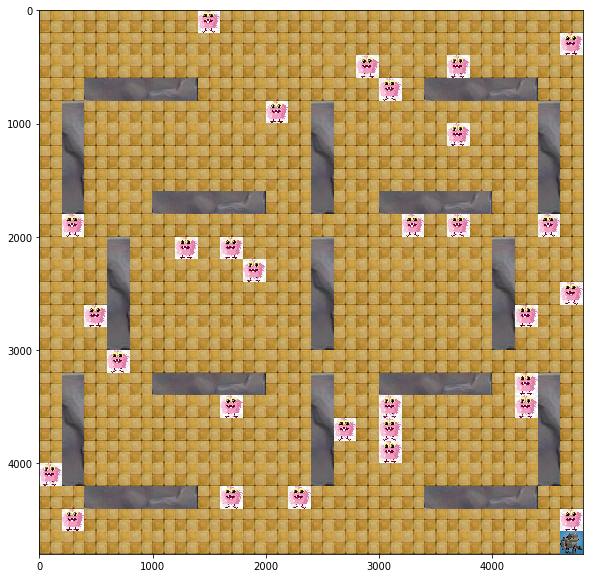

Your Status
Attack =  5
HP =  100


Please enter a movement W,A,S,D,E:  D


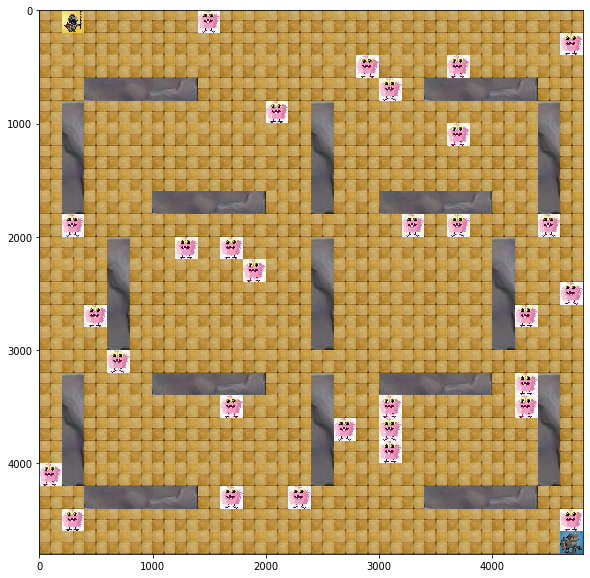

Your Status
Attack =  5
HP =  100


Please enter a movement W,A,S,D,E:  D


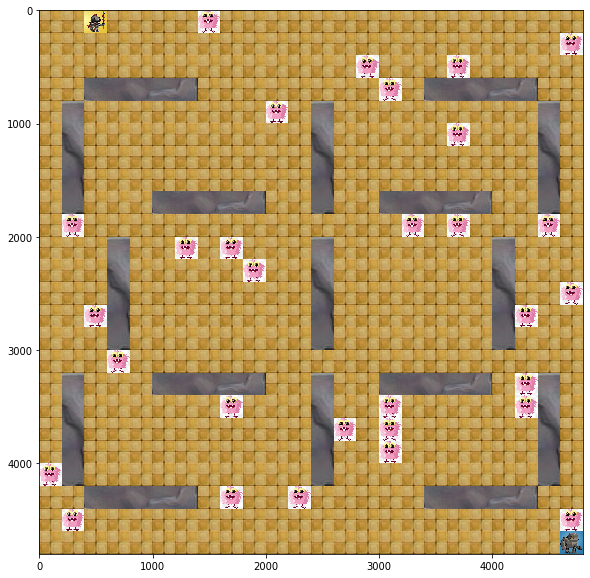

Your Status
Attack =  5
HP =  100


Please enter a movement W,A,S,D,E:  D


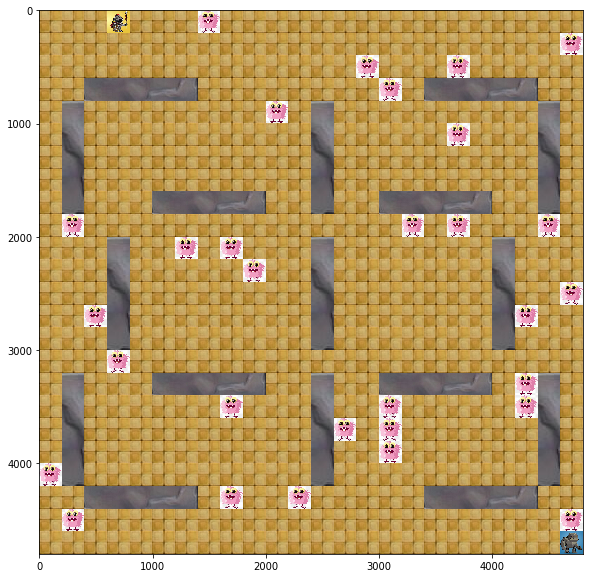

Your Status
Attack =  5
HP =  100


Please enter a movement W,A,S,D,E:  D


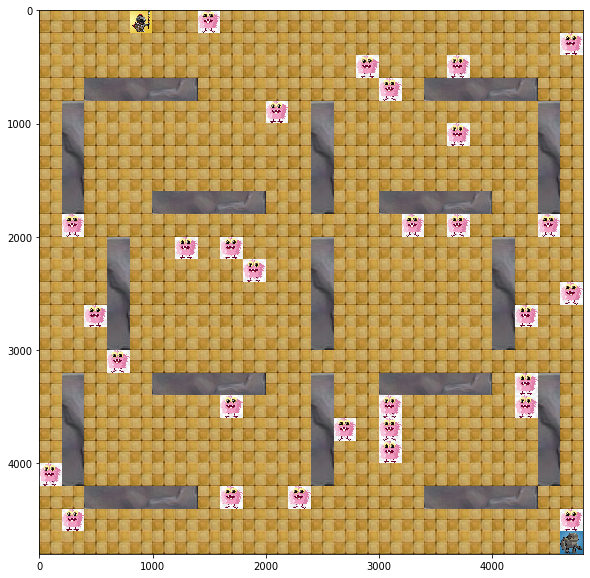

Your Status
Attack =  5
HP =  100


Please enter a movement W,A,S,D,E:  D


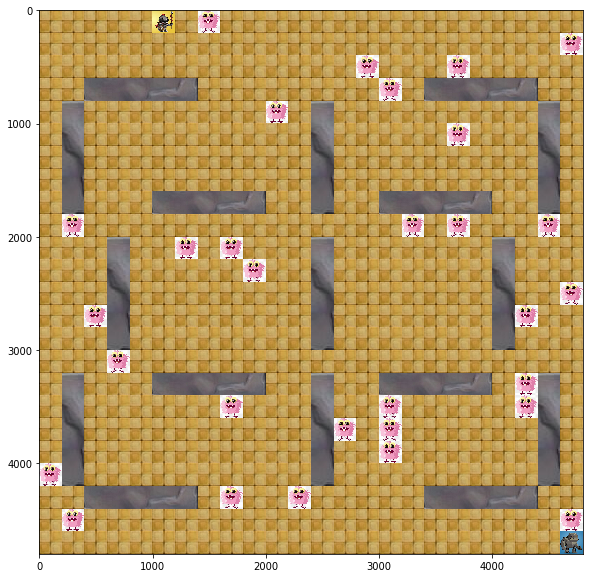

Your Status
Attack =  5
HP =  100


Please enter a movement W,A,S,D,E:  D


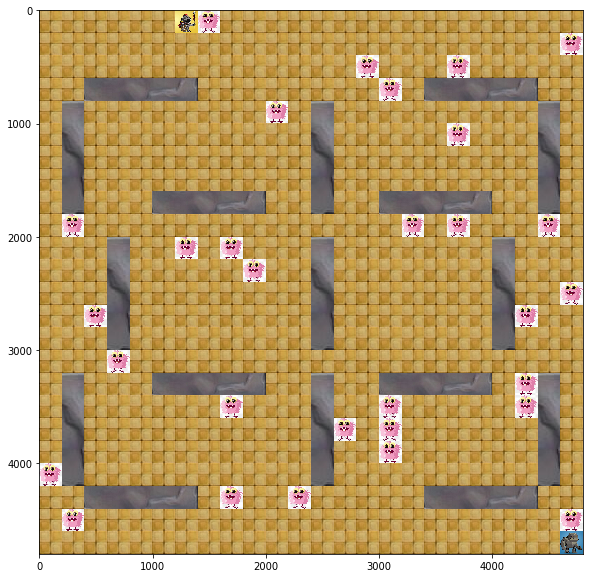

Your Status
Attack =  5
HP =  100


Please enter a movement W,A,S,D,E:  D


You encountered a monster! Now let's fight!
Monster attacked you! You now have 97 hit points!
You attacked the monster! It now has 95 hit points!
Monster attacked you! You now have 94 hit points!
You attacked the monster! It now has 90 hit points!
Monster attacked you! You now have 91 hit points!
You attacked the monster! It now has 85 hit points!
Monster attacked you! You now have 88 hit points!
You attacked the monster! It now has 80 hit points!
Monster attacked you! You now have 85 hit points!
You attacked the monster! It now has 75 hit points!
Monster attacked you! You now have 82 hit points!
You attacked the monster! It now has 70 hit points!
Monster attacked you! You now have 79 hit points!
You attacked the monster! It now has 65 hit points!
Monster attacked you! You now have 76 hit points!
You attacked the monster! It now has 60 hit points!
Monster attacked you! You now have 73 hit points!
You attacked the monster! It now has 55 hit points!
Monster attacked you! You now have 70 

You found a Goodie! Select from 1) Torch, 2) Archor, 3) Armor. 2


Now you have a archor in your hand, congratulations!
Your Attacks increased by 10!


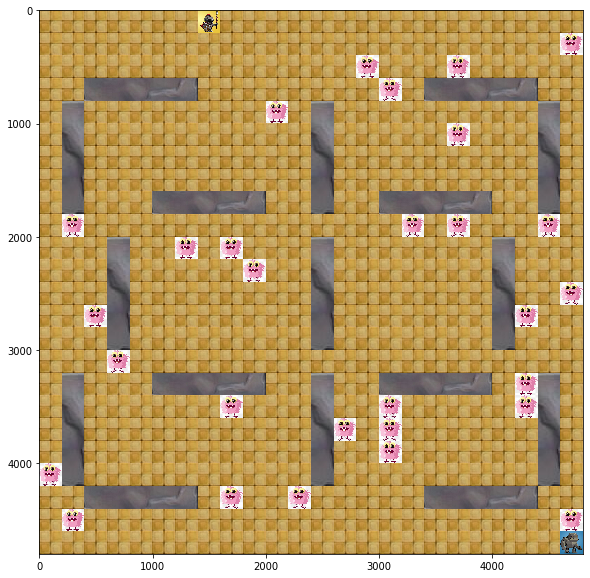

Your Status
Attack =  15
HP =  40


Please enter a movement W,A,S,D,E:  D


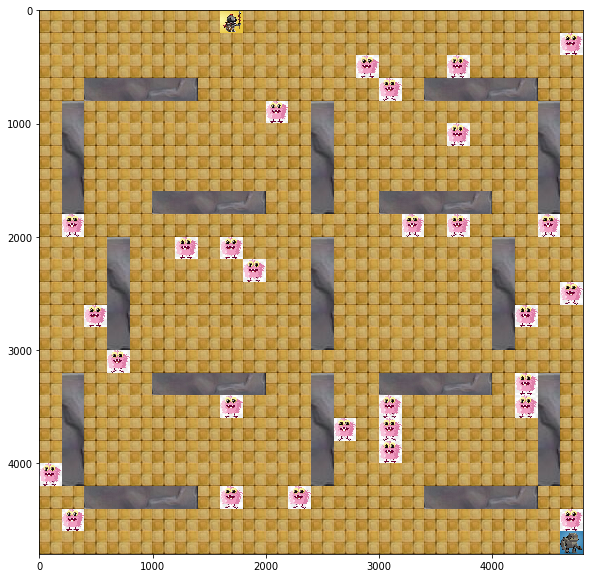

Your Status
Attack =  15
HP =  40


Please enter a movement W,A,S,D,E:  A


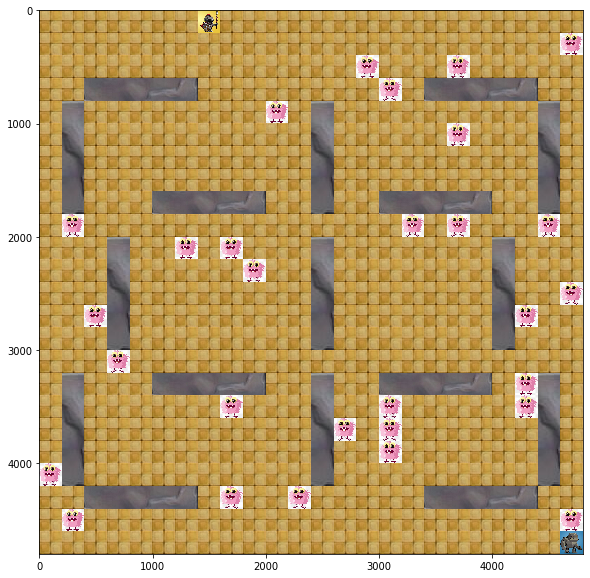

Your Status
Attack =  15
HP =  40


Please enter a movement W,A,S,D,E:  S


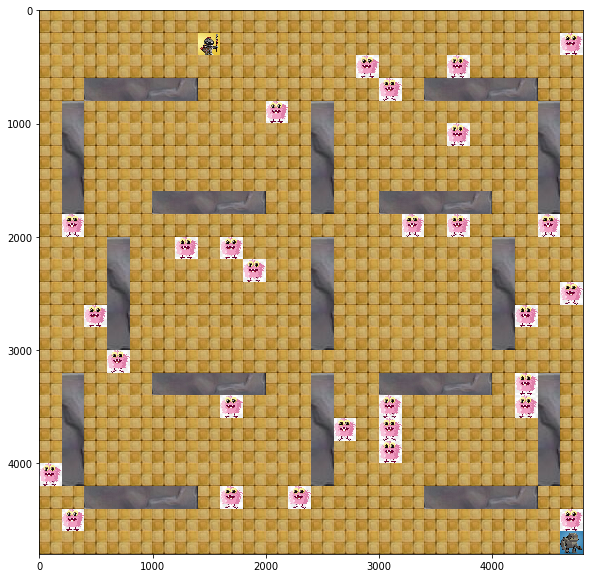

Your Status
Attack =  15
HP =  40


Please enter a movement W,A,S,D,E:  S


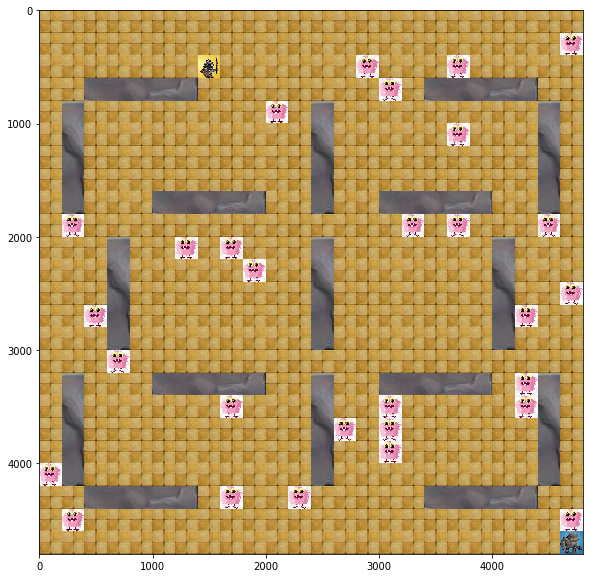

Your Status
Attack =  15
HP =  40


Please enter a movement W,A,S,D,E:  S


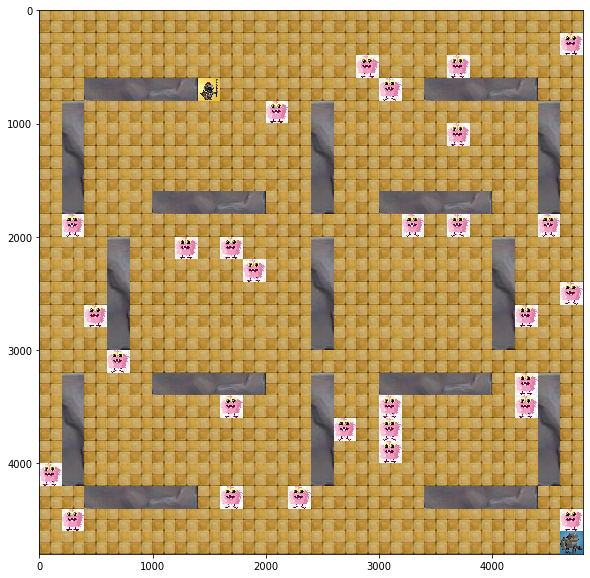

Your Status
Attack =  15
HP =  40


Please enter a movement W,A,S,D,E:  A


You hit the wall.


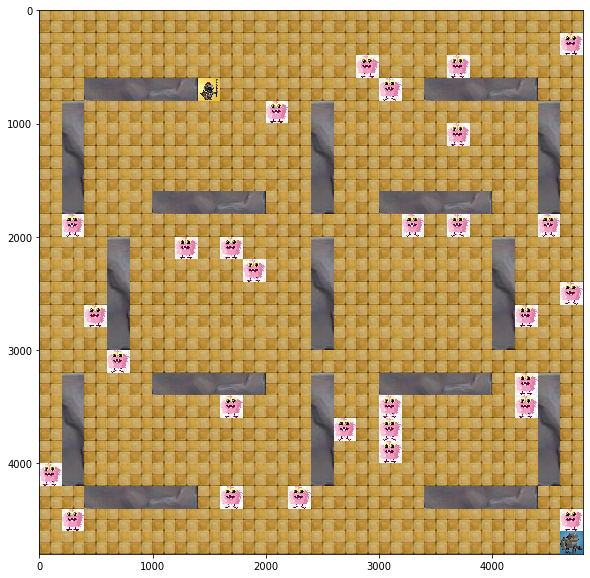

Your Status
Attack =  15
HP =  40


Please enter a movement W,A,S,D,E:  S


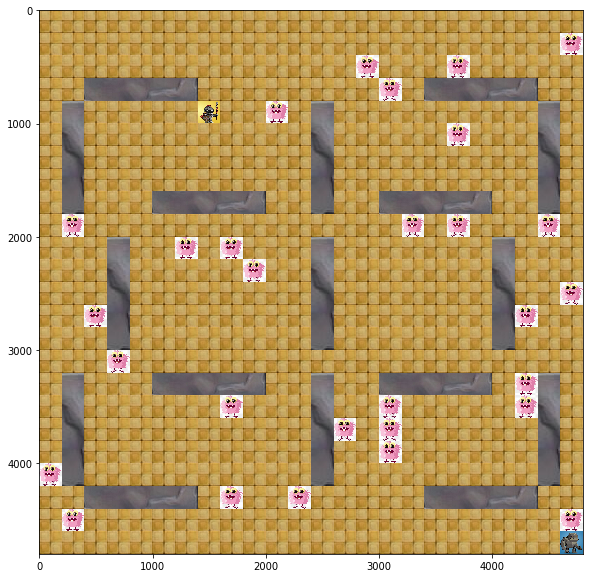

Your Status
Attack =  15
HP =  40


Please enter a movement W,A,S,D,E:  S


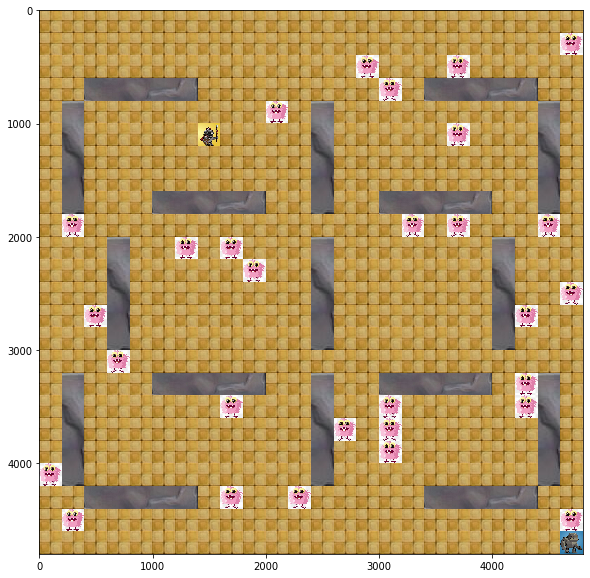

Your Status
Attack =  15
HP =  40


Please enter a movement W,A,S,D,E:  S


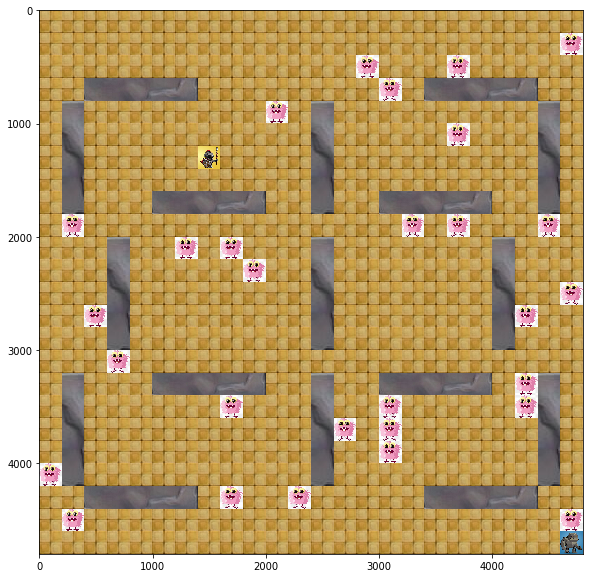

Your Status
Attack =  15
HP =  40


In [ ]:
MonsterGenerator(MonsterIndex, MonsterList)
game()